<a href="https://colab.research.google.com/github/ejooco/learning_tensorflow/blob/master/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Get Kaggle API token in json

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eamonoconnor","key":"64624ccce98231df9c5384a78f3457ed"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
#Copy API command from kaggle dataset

In [4]:
!kaggle datasets download -d pybear/cats-vs-dogs

 99% 783M/788M [00:06<00:00, 113MB/s]
100% 788M/788M [00:07<00:00, 118MB/s]


In [5]:
!ls

cats-vs-dogs.zip  drive  kaggle.json  sample_data


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('cats-vs-dogs.zip', 'r')
zip_ref.extractall('tmp')
zip_ref.close()

In [7]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [8]:
print(len(os.listdir('tmp/PetImages/Cat/')))
print(len(os.listdir('tmp/PetImages/Dog')))

12501
12501


In [9]:
try:
  #YOUR CODE GOES HERE
  print(os.listdir('tmp'))
  os.mkdir('tmp/cats-v-dogs')
  os.mkdir('tmp/cats-v-dogs/training')
  os.mkdir('tmp/cats-v-dogs/training/cats')
  os.mkdir('tmp/cats-v-dogs/training/dogs')
  os.mkdir('tmp/cats-v-dogs/testing')
  os.mkdir('tmp/cats-v-dogs/testing/cats')
  os.mkdir('tmp/cats-v-dogs/testing/dogs')

      #Validating folder creation - Eamon O'Connor
  for root, dirs, files in os.walk("/tmp/cats-v-dogs/"):
      path = root.split(os.sep)
      print((len(path) - 1) * '---', os.path.basename(root))
      for file in files:
          print(len(path) * '---', file)
    

except OSError as error:
  print(error)
  pass

['PetImages', 'MSR-LA - 3467.docx', 'readme[1].txt']


In [10]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  full_list = os.listdir(SOURCE)
  list_size = len(full_list)
  split_ratio = int(list_size * SPLIT_SIZE)
  shuffled_list = random.sample(full_list, len(full_list))

  training_list = shuffled_list[:split_ratio]
  testing_list = shuffled_list[split_ratio:]

  print(full_list[:4])
  print(shuffled_list[:4])
  print(list_size)

  for file in training_list:
    filepath = os.path.join(SOURCE, file)
    destpath = os.path.join(TRAINING, file)
    if os.path.getsize(filepath) > 0:
      copyfile(filepath, destpath)
    else:
      pass

  for file in testing_list:
    filepath = os.path.join(SOURCE, file)
    destpath = os.path.join(TESTING, file)
    if os.path.getsize(filepath) > 0:
      copyfile(filepath, destpath)
    else:
      pass
  
  training_files = os.listdir(TRAINING)
  training_size = len(training_files)
  testing_files = os.listdir(TESTING)
  testing_size = len(testing_files)

  print(training_files[:4])
  print(training_size)
  print(testing_files[:4])
  print(testing_size)




In [18]:
CAT_SOURCE_DIR = "/content/tmp/PetImages/Cat"
TRAINING_CATS_DIR = "/content/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/content/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/content/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/content/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/content/tmp/cats-v-dogs/testing/dogs/"

In [19]:
print(len(os.listdir(TRAINING_CATS_DIR)))

0


In [20]:
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

['1530.jpg', '11301.jpg', '4596.jpg', '8576.jpg']
['3797.jpg', '5522.jpg', '2579.jpg', '3666.jpg']
12501
['1530.jpg', '11301.jpg', '4596.jpg', '8576.jpg']
11249
['9728.jpg', '11357.jpg', '5661.jpg', '9498.jpg']
1251
['1530.jpg', '11301.jpg', '4596.jpg', '8576.jpg']
['6784.jpg', '7080.jpg', '3355.jpg', '5337.jpg']
12501
['1530.jpg', '11301.jpg', '4596.jpg', '8576.jpg']
11249
['10950.jpg', '8666.jpg', '4818.jpg', '3538.jpg']
1251


In [21]:
print(len(os.listdir('/content/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/content/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/content/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/content/tmp/cats-v-dogs/testing/dogs/')))

11249
11249
1251
1251


In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [23]:
TRAINING_DIR = '/content/tmp/cats-v-dogs/training'
train_datagen = ImageDataGenerator( rescale = 1.0/255. )

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   batch_size=10,
                                                   class_mode='binary',
                                                   target_size=(150, 150))

VALIDATION_DIR = '/content/tmp/cats-v-dogs/testing'
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                   batch_size=10,
                                                   class_mode='binary',
                                                   target_size=(150, 150))

Found 22496 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [24]:
history = model.fit(train_generator,
                              epochs=2,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/2
2205/2250 [============================>.] - ETA: 1s - loss: 0.6332 - acc: 0.6636

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

2250/2250 [==============================] - 85s 34ms/step - loss: 0.6320 - acc: 0.6645 - val_loss: 0.4732 - val_acc: 0.7702
Epoch 2/2
2250/2250 [==============================] - 78s 34ms/step - loss: 0.4836 - acc: 0.7734 - val_loss: 0.5830 - val_acc: 0.7430


Text(0.5, 1.0, 'Training and validation loss')

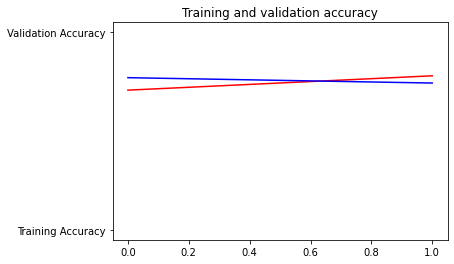

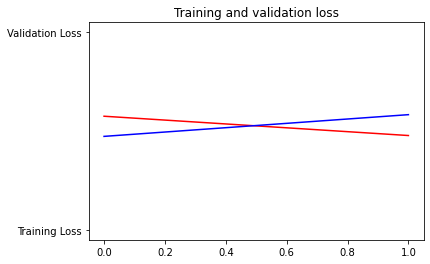

In [25]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)